compute the powerspectrum multipoles for halo catalog with $\sum m_\nu = 0. \mathrm{eV}$ at $z = 0$

In [8]:
import numpy as np
import nbodykit.lab as NBlab

In [9]:
import env
import data as Data 
import forwardmodel as FModel

In [10]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

read in the halo catalog 

In [11]:
halos_nbkt = Data._NeutHalos(0.0, 2, 4)
halos_paco = Data.NeutHalos(0.0, 2, 4)

Compute real-space $P(k)$

In [12]:
pk_h_real_nbkt = NBlab.FFTPower(halos_nbkt, mode='1d', Nmesh=256)
pk_h_real_paco = NBlab.FFTPower(halos_paco, mode='1d', Nmesh=256)

In [13]:
Phalo_nbkt = pk_h_real_nbkt.power
Phalo_paco = pk_h_real_paco.power

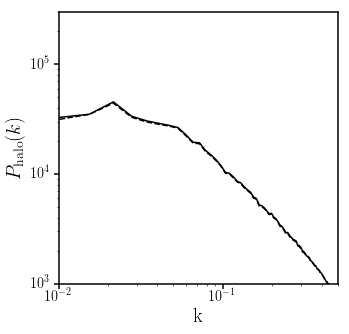

In [14]:
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
sub.plot(Phalo_nbkt['k'], Phalo_nbkt['power'].real - Phalo_nbkt.attrs['shotnoise'], c='k', label=r"$P^\mathrm{halo}$")
sub.plot(Phalo_paco['k'], Phalo_paco['power'].real - Phalo_paco.attrs['shotnoise'], ls='--', c='k')
sub.set_xlim([0.01, 0.5])
sub.set_xscale('log')
sub.set_xlabel('k', fontsize=20)
sub.set_ylim([1e3, 3e5])
sub.set_yscale('log')
sub.set_ylabel('$P_\mathrm{halo}(k)$', fontsize=20)

Real-space multipoles of P(k). This is more of a sanity check, since in real-space the quadrupole and hexadecapole should approach 0. 

In [15]:
mesh_nbkt = halos_nbkt.to_mesh(position='Position', Nmesh=256, compensated=True)
mesh_paco = halos_paco.to_mesh(position='Position', Nmesh=256, compensated=True)
plk_h_real_nbkt = NBlab.FFTPower(mesh_nbkt, mode='2d', dk=0.005, kmin=0.005, Nmu=5, los=[0,0,1], poles=[0,2,4])
plk_h_real_paco = NBlab.FFTPower(mesh_paco, mode='2d', dk=0.005, kmin=0.005, Nmu=5, los=[0,0,1], poles=[0,2,4])

In [16]:
poles_nbkt = plk_h_real_nbkt.poles
poles_paco = plk_h_real_paco.poles

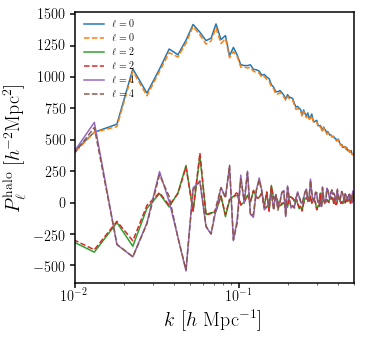

In [18]:
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
for ell in [0, 2, 4]:
    label = r'$\ell=%d$' % (ell)
    P = poles_nbkt['power_%d' %ell].real
    P_p = poles_paco['power_%d' %ell].real
    if ell == 0: 
        P = P - poles_nbkt.attrs['shotnoise']
        P_p = P_p - poles_paco.attrs['shotnoise']
    sub.plot(poles_nbkt['k'], poles_nbkt['k']*P, label=label)
    sub.plot(poles_paco['k'], poles_paco['k']*P_p, ls='--', label=label)
# format the axes
sub.legend(loc=0)
sub.set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", fontsize=20)
sub.set_xlim([0.01, 0.5])
sub.set_xscale('log')
sub.set_ylabel(r"$P^\mathrm{halo}_\ell$ [$h^{-2} \mathrm{Mpc}^2$]", fontsize=20)

Let us now consider redshift space distorted halos

In [19]:
LOS = [0,0,1]
halos_nbkt['RSDPosition'] = halos_nbkt['Position'] + halos_nbkt['VelocityOffset'] * LOS
halos_paco['RSDPosition'] = halos_paco['Position'] + halos_paco['VelocityOffset'] * LOS

In [20]:
mesh_nbkt = halos_nbkt.to_mesh(position='RSDPosition', Nmesh=256, compensated=True)
mesh_paco = halos_paco.to_mesh(position='RSDPosition', Nmesh=256, compensated=True)
plk_h_rsd_nbkt = NBlab.FFTPower(mesh_nbkt, mode='2d', dk=0.005, kmin=0.005, Nmu=5, los=[0,0,1], poles=[0,2,4])
plk_h_rsd_paco = NBlab.FFTPower(mesh_paco, mode='2d', dk=0.005, kmin=0.005, Nmu=5, los=[0,0,1], poles=[0,2,4])

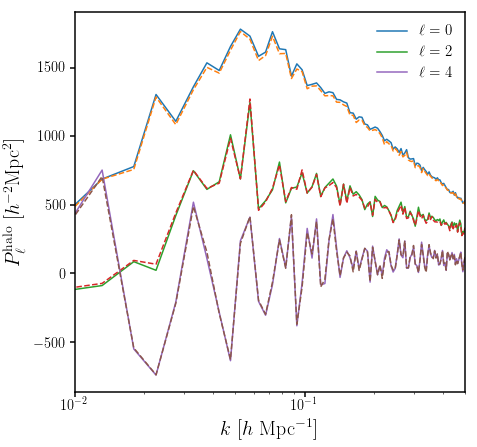

In [24]:
rsd_poles_nbkt = plk_h_rsd_nbkt.poles
rsd_poles_paco = plk_h_rsd_paco.poles

fig = plt.figure(figsize=(7,7))
sub = fig.add_subplot(111)
for ell in [0, 2, 4]:
    label = r'$\ell=%d$' % (ell)
    P = rsd_poles_nbkt['power_%d' %ell].real
    P_p = rsd_poles_paco['power_%d' %ell].real
    if ell == 0: 
        P = P - rsd_poles_nbkt.attrs['shotnoise']
        P_p = P_p - rsd_poles_paco.attrs['shotnoise']
    sub.plot(rsd_poles_nbkt['k'], rsd_poles_nbkt['k']*P, label=label)
    sub.plot(rsd_poles_paco['k'], rsd_poles_paco['k']*P_p, ls='--')#, label=label)
# format the axes
sub.legend(loc=0, prop={"size": 15})
sub.set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", fontsize=20)
sub.set_xlim([0.01, 0.5])
sub.set_xscale('log')
sub.set_ylabel(r"$P^\mathrm{halo}_\ell$ [$h^{-2} \mathrm{Mpc}^2$]", fontsize=20)